In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('shopping-data.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df=df.drop_duplicates()

In [7]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


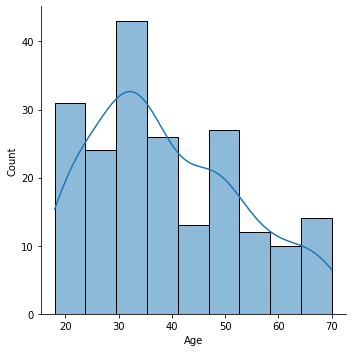

In [10]:
sns.displot(df['Age'],kde=True);

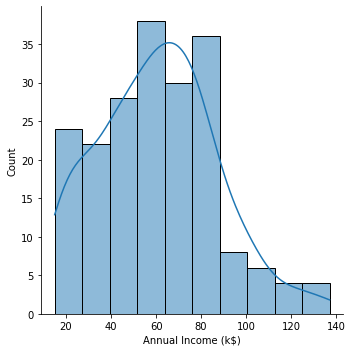

In [11]:
sns.displot(df['Annual Income (k$)'],kde=True);

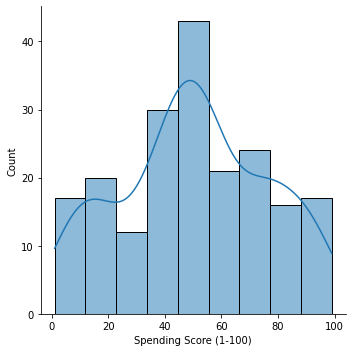

In [12]:
sns.displot(df['Spending Score (1-100)'],kde=True);

In [13]:
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

c:\users\bhupesh\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


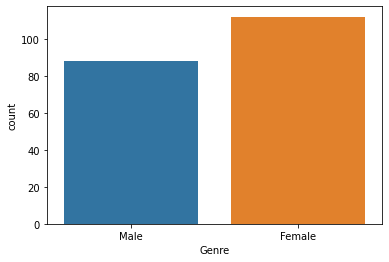

In [14]:
sns.countplot(df['Genre'],data=df)
plt.show()

In [15]:
df=df.drop(['Genre','Age','CustomerID'],axis=1)

In [16]:
from sklearn.cluster import KMeans

In [17]:
spread=[]
for i in range(2,11):
    model=KMeans(n_clusters=i)
    model.fit(df)
    spread.append(model.inertia_)

In [18]:
spread

[181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25011.839349156595,
 21797.08494464637,
 19740.010370359298]

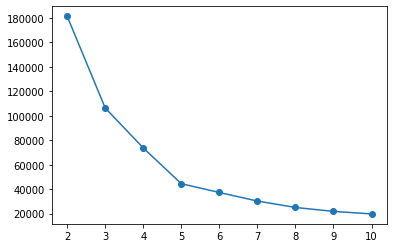

In [19]:
plt.plot(list(range(2,11)),spread,marker='o');

In [20]:
model=KMeans(n_clusters=5)

In [21]:
model.fit(df)

KMeans(n_clusters=5)

In [22]:
label=model.labels_

In [23]:
center=model.cluster_centers_

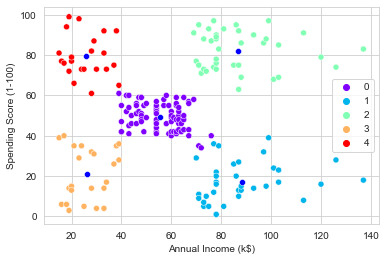

In [24]:
sns.set_style('whitegrid')
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df, palette='rainbow',hue=label)
sns.scatterplot(x=center[:,0],y=center[:,1],color= 'blue');